In [1]:
import simulationlib as sl
import lasinglib as ll
import measurelib as ml
%matplotlib widget
import annealing_database2 as adb2

import modulators as mo
import shapes

import numpy as np
import matplotlib.pyplot as plt

import logging
import os


DBPATH = r".\annealing records\50um Al ASB New Database\50um Al ASB.dill"
database = adb2.DatabaseWrapper(DBPATH)

# write directly to TAP directory...
TAP_dbpath = r"C:\Users\ssuub\Desktop\MPSD-TAP\TAPV-2\Application\pythonFiles\DataTextFiles"
PULSE_PROFILING_LOCATION = (24, 27)

In [2]:
# This works for most sequences and is reasonably fast to simulate
CHIP = sl.SimGrid(dimension=32, resolution=101, thickness=0.03, use_spar=False,
                  spar_thickness=0.5, spar_width=1)

SILICON = sl.Material(diffusivity=88, emissivity=0.09, specific_heat=0.7, density=0.002329002)

# 19.9.2024 actually usable coord area with a reasonable fraction of full intensity:
# this is due to bad calibration
# x_domain = [2.5, 32.5] # x = 2.5 should be xmin = 1, x=32.5 should be xmax = 31
# y_domain = [-4, 26] # y = -4 should be ymin = 1, y = 26 should by ymax = 31

# make sure these line up with the ones declared in TAP's settings; these are used to zero edges out better.
CENTERING_OFFSETS = (-2, -1.5)
PULSE_PROFILING_LOCATION = (24, 27)

LaserSequence(['Pulse(6.000W, 0.000 + 300.000S -> 300.0001MOD)']) 1


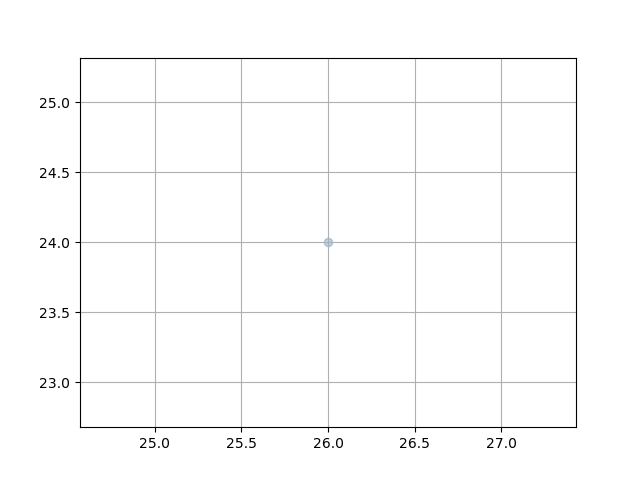

In [13]:
# Design your annealing cycle here

pulses = []
numpulses = 1
x, y = 26, 24
power = 6 # W
overall_wait = 400
duration = 300
a = 0.05
b = 0

mod = mo.double_exp(a, b)

notes=f"300s @6W to test if damage accumulates with pulses or irradiation time, hold double exp a: {a} b: {b}. preheat@46C"

pulses.append(ll.LaserPulse(grid=CHIP, start=0, duration=duration, position=(x, y), power=power, modulators=[mod], sigma=ll.DEFAULT_LASER_SIGMA))

seq = ll.LaserSequence(pulses, start_time=0, delay=overall_wait - duration)


seq.build_trace()

print(seq, len(pulses))
fig, ax = plt.subplots()
ax.scatter(seq.trace_x, seq.trace_y, alpha=.3)
ax.grid()

LaserSequence(['Pulse(6.000W, 0.000 + 1.000S -> 1.000NOMOD)', 'Pulse(6.000W, 2.000 + 1.000S -> 3.000NOMOD)', 'Pulse(6.000W, 4.000 + 1.000S -> 5.000NOMOD)', 'Pulse(6.000W, 6.000 + 1.000S -> 7.000NOMOD)', 'Pulse(6.000W, 8.000 + 1.000S -> 9.000NOMOD)', 'Pulse(6.000W, 10.000 + 1.000S -> 11.000NOMOD)', 'Pulse(6.000W, 12.000 + 1.000S -> 13.000NOMOD)', 'and 466 additional pulse(s).']) 1


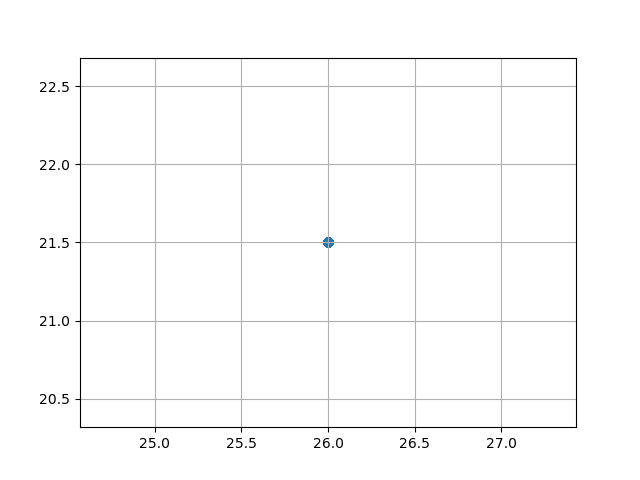

In [16]:
# Design your annealing cycle here

pulses = []
numpulses = 472
x, y = 26, 21.5
power = 6 # W
overall_wait = 400
duration = 1

notes=f"472 x 1s @6W to test if damage accumulates with pulses or irradiation time, binary pulses. preheat@30C"

pulses.append(ll.LaserPulse(grid=CHIP, start=0, duration=duration, position=(x, y), power=power, sigma=ll.DEFAULT_LASER_SIGMA))

seq = ll.LaserSequence(pulses * numpulses, start_time=0, delay=1)


seq.build_trace()

print(seq, len(pulses))
fig, ax = plt.subplots()
ax.scatter(seq.trace_x, seq.trace_y, alpha=.3)
ax.grid()

In [6]:
# Design your annealing cycle here

pulses = []
numpulses = 472
x, y = 26, 26.5
# x, y = -4, 16 # preheat coords

power = 6 # W
LASING_CUTOFF = 0.7 # W, mimimum achievable lasing power
LASING_CUTOFF_RATIO = LASING_CUTOFF / power

overall_wait = 60
hold_time = 1
b = 0.05

viable_falloff_time = (np.log(LASING_CUTOFF_RATIO) / (-b)) # the decay time needed to reach lasing threshold
duration = hold_time + viable_falloff_time
print(duration)

mod = mo.exp_cool(hold_time, b)

notes=f"300 x 1s (hold) @6W slow cool rapid heat, exp cool b: {b} to lasing threshold. preheat@32C"

pulses.append(ll.LaserPulse(grid=CHIP, start=0, duration=duration, position=(x, y), power=power, modulators=[mod], sigma=ll.DEFAULT_LASER_SIGMA))

seq = ll.LaserSequence(pulses * numpulses, start_time=0, delay=overall_wait - duration)


seq.build_trace()

print(seq, len(pulses))
fig, ax = plt.subplots()
ax.scatter(seq.trace_x, seq.trace_y, alpha=.3)
ax.grid()

43.96868826333574


NameError: name 'CHIP' is not defined

0.0
1
0.030015007503751877
1
0.060030015007503754
1
0.09004502251125562
1
0.12006003001500751
1
0.1500750375187594
1
0.18009004502251125
1
0.21010505252626313
1
0.24012006003001501
1
0.27013506753376687
1
0.3001500750375188
1
0.33016508254127064
1
0.3601800900450225
1
0.3901950975487744
1
0.42021010505252626
1
0.4502251125562782
1
0.48024012006003003
1
0.5102551275637819
1
0.5402701350675337
1
0.5702851425712857
1
0.6003001500750376
1
0.6303151575787894
1
0.6603301650825413
1
0.6903451725862931
1
0.720360180090045
1
0.750375187593797
1
0.7803901950975488
1
0.8104052026013007
1
0.8404202101050525
1
0.8704352176088044
1
0.9004502251125563
1
0.9304652326163082
1
0.9604802401200601
1
0.9904952476238119
1
1.0205102551275638
0.9989750129021233
1.0505252626313157
0.9974769251857313
1.0805402701350675
0.9959810840388499
1.1105552776388194
0.9944874860924678
1.1405702851425714
0.9929961279826262
1.1705852926463232
0.9915070063504102
1.2006003001500751
0.9900201178419428
1.2306153076538269
0.988

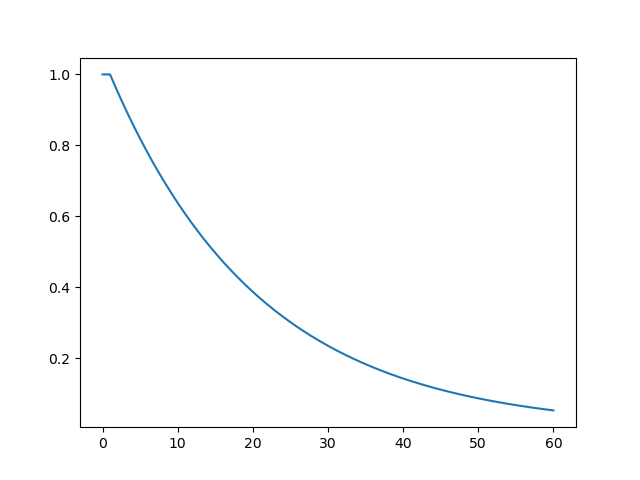

In [4]:
t = np.linspace(0, 60, 2000)
y = [mod(tim) for tim in t]

plt.close(12)
fig12, ax12 = plt.subplots(num=12)

ax12.plot(t, y)
plt.show()

In [3]:
# Design your annealing cycle here

pulses = []
numpulses = 472
x, y = 23.5, 26.5
# x, y = -4, 16 # preheat coords

power = 6 # W
LASING_CUTOFF = 0.7 # W, mimimum achievable lasing power
LASING_CUTOFF_RATIO = LASING_CUTOFF / power

overall_wait = 30
a = 0.05

cutoff_time = np.log(2) / a
print(cutoff_time)
duration = viable_falloff_time + cutoff_time
print(duration)

mod = mo.double_exp(a, 2000)

notes=f"300 x 1s (hold) @6W exp heat, rapid cool b: {b} to lasing threshold"

pulses.append(ll.LaserPulse(grid=CHIP, start=0, duration=duration, position=(x, y), power=power, modulators=[mod], sigma=ll.DEFAULT_LASER_SIGMA))

seq = ll.LaserSequence(pulses * numpulses, start_time=0, delay=overall_wait - duration)


seq.build_trace()

print(seq, len(pulses))
fig, ax = plt.subplots()

ax.scatter(seq.trace_x, seq.trace_y, alpha=.3)
ax.grid()

13.862943611198904


NameError: name 'viable_falloff_time' is not defined

128.90606479000724
LaserSequence(['Pulse(6.000W, 0.000 + 128.906S -> 128.9061MOD)']) 1


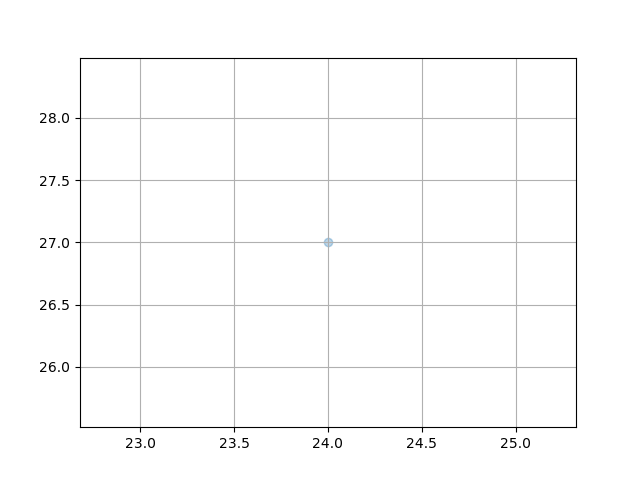

In [21]:
# Design your annealing cycle here

pulses = []
numpulses = 1#472
# x, y = 23.5, 21
x, y = PULSE_PROFILING_LOCATION

power = 6 # W
LASING_CUTOFF = 0.7 # W, mimimum achievable lasing power
LASING_CUTOFF_RATIO = LASING_CUTOFF / power

overall_wait = 120
a = 0.025
b = 0.05

up_time = -np.log(LASING_CUTOFF_RATIO) / a
down_time = -np.log(LASING_CUTOFF_RATIO) / b
duration = up_time + down_time
print(duration) 

mod = mo.double_exp2(a, b, 0.7 / 6)

notes=f"472 pulses ramp to 6W and down, double exp a: {a} b: {b}. preheat@32C"

pulses.append(ll.LaserPulse(grid=CHIP, start=0, duration=duration, position=(x, y), power=power, modulators=[mod], sigma=ll.DEFAULT_LASER_SIGMA))

seq = ll.LaserSequence(pulses * numpulses, start_time=0, delay=overall_wait - duration)


seq.build_trace()

print(seq, len(pulses))
fig, ax = plt.subplots()
ax.scatter(seq.trace_x, seq.trace_y, alpha=.3)
ax.grid()

128.90606479000724
LaserSequence(['Pulse(6.000W, 0.000 + 128.906S -> 128.9061MOD)', 'Pulse(6.000W, 120.000 + 128.906S -> 248.9061MOD)', 'Pulse(6.000W, 240.000 + 128.906S -> 368.9061MOD)', 'Pulse(6.000W, 360.000 + 128.906S -> 488.9061MOD)', 'Pulse(6.000W, 480.000 + 128.906S -> 608.9061MOD)', 'Pulse(6.000W, 600.000 + 128.906S -> 728.9061MOD)', 'Pulse(6.000W, 720.000 + 128.906S -> 848.9061MOD)', 'and 466 additional pulse(s).']) 1


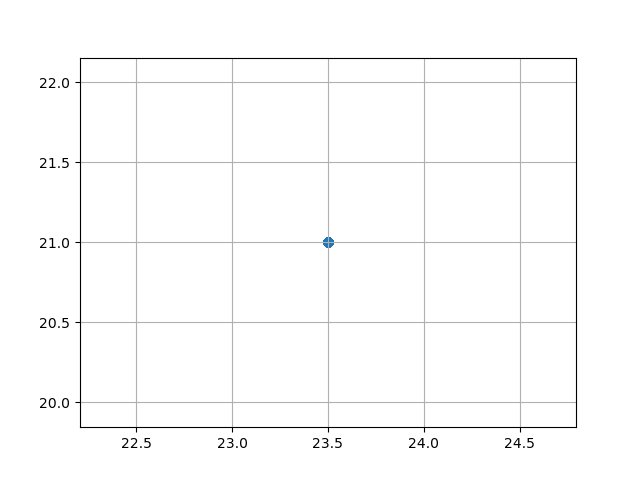

In [9]:
# Design your annealing cycle here

pulses = []
numpulses = 472
x, y = 23.5, 21
# x, y = PULSE_PROFILING_LOCATION

power = 6 # W
LASING_CUTOFF = 0.7 # W, mimimum achievable lasing power
LASING_CUTOFF_RATIO = LASING_CUTOFF / power

overall_wait = 120
a = 0.025
b = 0.05

up_time = -np.log(LASING_CUTOFF_RATIO) / a
down_time = -np.log(LASING_CUTOFF_RATIO) / b
duration = up_time + down_time
print(duration) 

mod = mo.double_exp2(a, b, LASING_CUTOFF_RATIO)

notes=f"472 pulses ramp to 6W and down, double exp a: {a} b: {b}. preheat@32C"

pulses.append(ll.LaserPulse(grid=CHIP, start=0, duration=duration, position=(x, y), power=power, modulators=[mod], sigma=ll.DEFAULT_LASER_SIGMA))

seq = ll.LaserSequence(pulses * numpulses, start_time=0, delay=overall_wait - duration)


seq.build_trace()

print(seq, len(pulses))
fig, ax = plt.subplots()
ax.scatter(seq.trace_x, seq.trace_y, alpha=.3)
ax.grid()

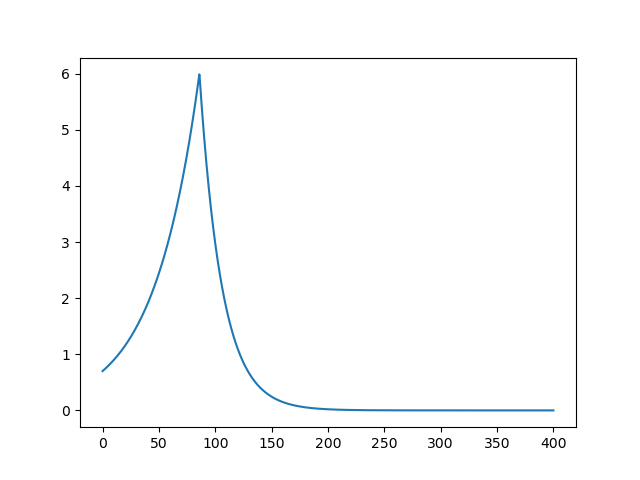

In [10]:
t = np.linspace(0, 400, 2000)
y = [6 * mod(tim) for tim in t]

plt.close(12)
fig12, ax12 = plt.subplots(num=12)

ax12.plot(t, y)
plt.show()

128.90606479000724
LaserSequence(['Pulse(6.000W, 0.000 + 10828.109S -> 10828.1091MOD)']) 1


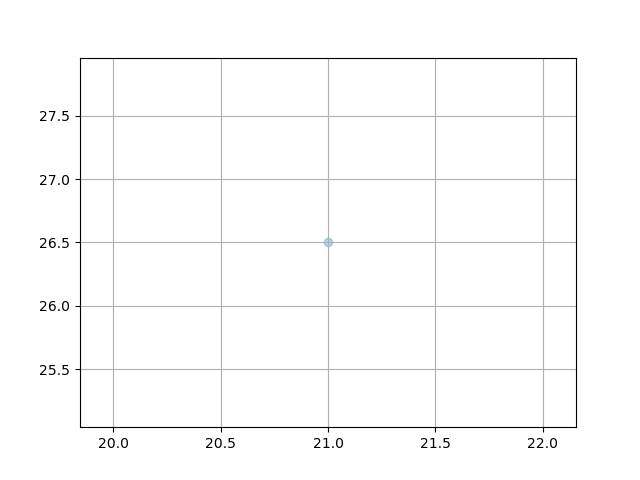

In [23]:
# Design your annealing cycle here

pulses = []
numpulses = 84
x, y = 21, 26.5
# x, y = PULSE_PROFILING_LOCATION

power = 6 # W
LASING_CUTOFF = 0.7 # W, mimimum achievable lasing power
LASING_CUTOFF_RATIO = LASING_CUTOFF / power

overall_wait = 120
a = 0.025
b = 0.05

up_time = -np.log(LASING_CUTOFF_RATIO) / a
down_time = -np.log(LASING_CUTOFF_RATIO) / b
duration = up_time + down_time
print(duration) 

mod = mo.double_exp2(a, b, LASING_CUTOFF_RATIO)

def cyclical_heating(t):
    return mod(t % duration)

notes=f"one pulse with thermal cycling, slow ramp up then modulate between 6 and 0.7W for 3h"

pulses.append(ll.LaserPulse(grid=CHIP, start=0, duration=duration * numpulses, position=(x, y), power=power, modulators=[cyclical_heating], sigma=ll.DEFAULT_LASER_SIGMA))

seq = ll.LaserSequence(pulses, start_time=0, delay=1)


seq.build_trace()

print(seq, len(pulses))
fig, ax = plt.subplots()
ax.scatter(seq.trace_x, seq.trace_y, alpha=.3)
ax.grid()

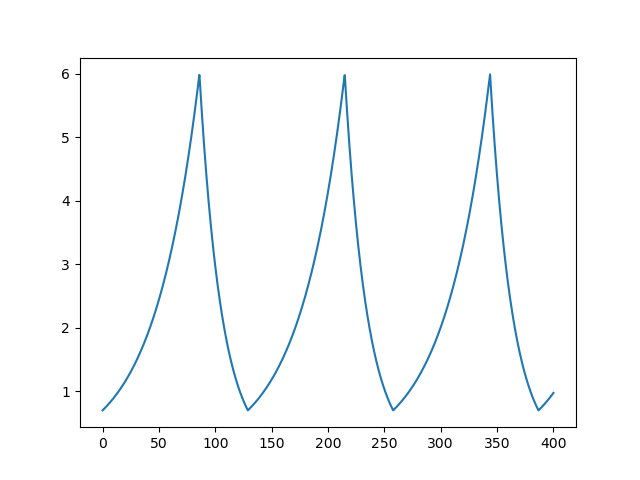

In [14]:
t = np.linspace(0, 400, 2000)
y = [6 * cyclical_heating(tim) for tim in t]

plt.close(12)
fig12, ax12 = plt.subplots(num=12)

ax12.plot(t, y)
plt.show()

In [ ]:
# simulate sequence if desired

sim = sl.Simulation(CHIP, SILICON, duration=seq.duration + 4, pulses=[seq], ambient_temp=300,
                    starting_temp=300, neumann_bc=False,
                    edge_derivative=0, sample_framerate=24, intended_pbs=1,
                    dense_logging=False, timestep_multi=0.75, radiation=True, progress_bar=True, silent=False)

sim.simulate()

In [ ]:
# animate
from IPython.display import HTML
ani = sim.animate(cmap="magma")
plt.close()
# use plt.show() for more rigorous examinations
HTML(ani.to_jshtml())

In [24]:
# write seq to TAP cycle code
seq.write_to_cycle_code(TAP_dbpath + "/michaeltest1.txt", 0.03, *CENTERING_OFFSETS)

In [25]:
# If you have actually fired this pattern on the chip, save it to the annealing database record!
database.write_sequence(seq, notes=notes)

CSV modified
Pulse c9d35475850c994f9e7c728265ed7e29 no longer found in csv record, removing...
CSV modified


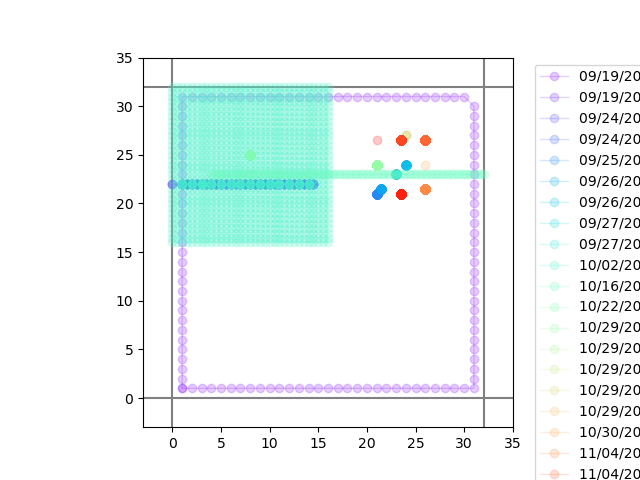

In [26]:
# view the current database entries
database.visualize()

In [29]:
# backup database
database.backup(note="pre-commit")

'Backup 11-12-2024, 16;34; pre-commit'

In [7]:
print(database.get_record())

[('9b01f42e293ea60de7bf85114278196a', 09/19/2024, 17:11:38
Annealing cycle: LaserSequence(['Pulse(6.000W, 0.000 + 0.030S -> 0.030NOMOD)', 'Pulse(6.000W, 0.230 + 0.030S -> 0.260NOMOD)', 'Pulse(6.000W, 0.460 + 0.030S -> 0.490NOMOD)', 'Pulse(6.000W, 0.690 + 0.030S -> 0.720NOMOD)', 'Pulse(6.000W, 0.920 + 0.030S -> 0.950NOMOD)', 'Pulse(6.000W, 1.150 + 0.030S -> 1.180NOMOD)', 'Pulse(6.000W, 1.380 + 0.030S -> 1.410NOMOD)', 'and 114 additional pulse(s).'])), ('d3192212c38b2819b4ccf43d8299cc9c', 09/19/2024, 18:11:12
Annealing cycle: LaserSequence(['Pulse(6.000W, 0.000 + 1.000S -> 1.000NOMOD)', 'Pulse(6.000W, 6.000 + 1.000S -> 7.000NOMOD)', 'Pulse(6.000W, 12.000 + 1.000S -> 13.000NOMOD)', 'Pulse(6.000W, 18.000 + 1.000S -> 19.000NOMOD)', 'Pulse(6.000W, 24.000 + 1.000S -> 25.000NOMOD)', 'Pulse(6.000W, 30.000 + 1.000S -> 31.000NOMOD)', 'Pulse(6.000W, 36.000 + 1.000S -> 37.000NOMOD)', 'and 54 additional pulse(s).'])), ('144bae7c866ddae199652f191c50a8c7', 09/24/2024, 17:32:35
Annealing cycle: edge te

In [10]:
import position_voltage_converter as pvcs
import numpy

def patch_asscalar(a):
    return a.item()

setattr(numpy, "asscalar", patch_asscalar)
print(pvcs.voltage_from_position(23.5 - 2, 21 - 1.5))
pvcs.position_from_voltage(1.301, 2.851, account_for_outer_ring=False)

(1.301066642698758, 2.8510258579292302)


[21.60226069133386, -23.862682407561522]